In [1]:
import kagglehub

path = kagglehub.dataset_download("shubhammeshram579/bank-customer-churn-prediction")
print("Path to dataset files:", path)

Path to dataset files: /home/ananthu/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1


In [2]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv("/home/ananthu/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
print(data.columns)
print(data.shape)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
(10002, 14)


In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(data.shape)
data.head()

(10002, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

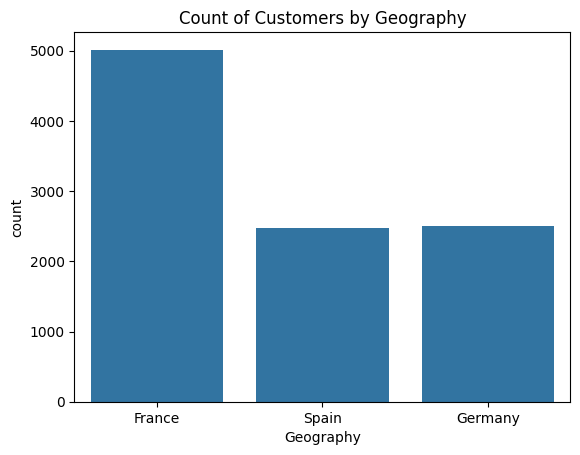

In [20]:
sns.countplot(x='Geography', data=data)
plt.title('Count of Customers by Geography')
plt.show()

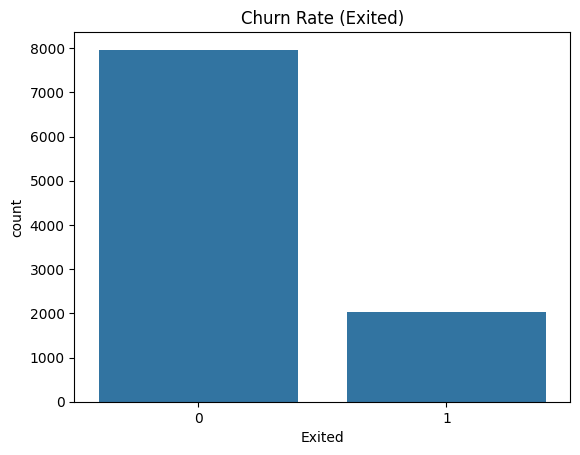

In [22]:
sns.countplot(x='Exited', data=data)
plt.title('Churn Rate (Exited)')
plt.show()

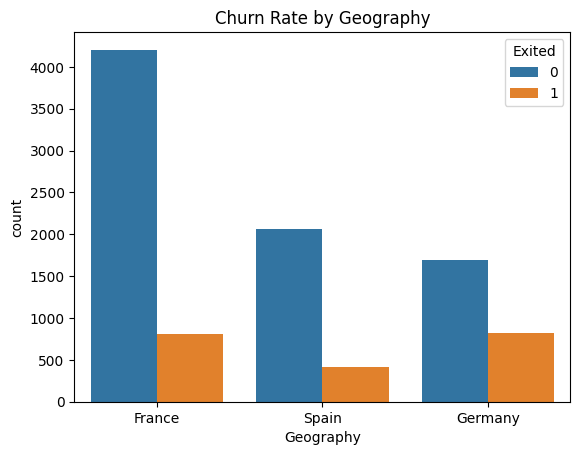

In [23]:
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Churn Rate by Geography')
plt.show()


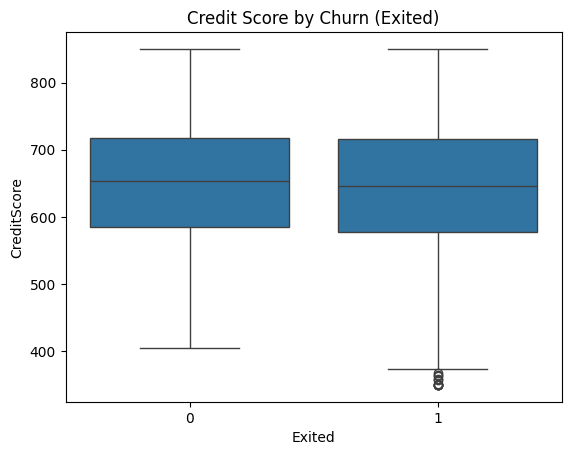

In [24]:
sns.boxplot(x='Exited', y='CreditScore', data=data)
plt.title('Credit Score by Churn (Exited)')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
for column in ['Geography', 'Gender']:
    data[column] = label_encoder.fit_transform(data[column])


data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [8]:
churned = data[data['Exited'] == 1]
not_churned = data[data['Exited'] == 0]

In [9]:
from sklearn.utils import resample


churned_upsampled = resample(churned, replace=True, n_samples=len(not_churned), random_state=42)  

print("Churned Upsampled shape:", churned_upsampled.shape)
print("Non-churned shape:", not_churned.shape)


Churned Upsampled shape: (7964, 11)
Non-churned shape: (7964, 11)


In [10]:
upsampled_data = pd.concat([not_churned, churned_upsampled])
print("Combined Upsampled Data shape:", upsampled_data.shape)

Combined Upsampled Data shape: (15928, 11)


In [11]:
X_upsampled = upsampled_data.drop('Exited', axis=1)  
y_upsampled = upsampled_data['Exited']

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
X_upsampled_imputed = imputer.fit_transform(X_upsampled)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_upsampled_imputed, y_upsampled, test_size=0.2, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1575
           1       0.88      0.97      0.92      1611

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186

